In [160]:
%matplotlib inline
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [161]:
data_files = glob.glob('Data/*.csv')

combined = []

for file in data_files:
    file_df = pd.read_csv(file)
    combined.append(file_df)

df = pd.concat(combined, axis=0)
df.head()

,date,location,energy,congestion,loss
0,2017-01-01T00:00:00,NEWHAMPSHIRE,34.86,0.0,-0.09
1,2017-01-01T01:00:00,NEWHAMPSHIRE,33.72,0.0,-0.15
2,2017-01-01T02:00:00,NEWHAMPSHIRE,32.40,0.0,-0.15
3,2017-01-01T03:00:00,NEWHAMPSHIRE,25.88,0.0,-0.12
4,2017-01-01T04:00:00,NEWHAMPSHIRE,29.65,0.0,-0.12


In [162]:
df['date'] = pd.to_datetime(df['date'])

In [163]:
df['lmp'] = df['energy'] + df['congestion'] + df['loss']
df.drop(['energy', 'congestion', 'loss'], axis=1, inplace=True)
df.head()

,date,location,lmp
0,2017-01-01 00:00:00,NEWHAMPSHIRE,34.77
1,2017-01-01 01:00:00,NEWHAMPSHIRE,33.57
2,2017-01-01 02:00:00,NEWHAMPSHIRE,32.25
3,2017-01-01 03:00:00,NEWHAMPSHIRE,25.76
4,2017-01-01 04:00:00,NEWHAMPSHIRE,29.53


In [164]:
df = pd.get_dummies(df, columns=['location'])
df.head()

,date,lmp,location_CONNECTICUT,location_MAINE,location_NEMASSBOST,location_NEWHAMPSHIRE,location_RHODEISLAND,location_SEMASS,location_VERMONT,location_WCMASS
0,2017-01-01 00:00:00,34.77,False,False,False,True,False,False,False,False
1,2017-01-01 01:00:00,33.57,False,False,False,True,False,False,False,False
2,2017-01-01 02:00:00,32.25,False,False,False,True,False,False,False,False
3,2017-01-01 03:00:00,25.76,False,False,False,True,False,False,False,False
4,2017-01-01 04:00:00,29.53,False,False,False,True,False,False,False,False


In [165]:
df['year'] = df.date.dt.year
df['quarter'] = df.date.dt.quarter
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['hour'] = df.date.dt.hour
df['day_of_year'] = df.date.dt.dayofyear
df['week_of_year'] = df.date.dt.dayofweek
df['day_of_week'] = df.date.dt.dayofweek

In [166]:
import holidays

us_holidays = holidays.US()

df['is_holiday'] = df['date'].apply(lambda dt : dt in us_holidays)
df.head()

,date,lmp,location_CONNECTICUT,location_MAINE,location_NEMASSBOST,location_NEWHAMPSHIRE,location_RHODEISLAND,location_SEMASS,location_VERMONT,location_WCMASS,year,quarter,month,day,hour,day_of_year,week_of_year,day_of_week,is_holiday
0,2017-01-01 00:00:00,34.77,False,False,False,True,False,False,False,False,2017,1,1,1,0,1,6,6,True
1,2017-01-01 01:00:00,33.57,False,False,False,True,False,False,False,False,2017,1,1,1,1,1,6,6,True
2,2017-01-01 02:00:00,32.25,False,False,False,True,False,False,False,False,2017,1,1,1,2,1,6,6,True
3,2017-01-01 03:00:00,25.76,False,False,False,True,False,False,False,False,2017,1,1,1,3,1,6,6,True
4,2017-01-01 04:00:00,29.53,False,False,False,True,False,False,False,False,2017,1,1,1,4,1,6,6,True


In [167]:
df.drop('date', axis=1, inplace=True)
df.head()

,lmp,location_CONNECTICUT,location_MAINE,location_NEMASSBOST,location_NEWHAMPSHIRE,location_RHODEISLAND,location_SEMASS,location_VERMONT,location_WCMASS,year,quarter,month,day,hour,day_of_year,week_of_year,day_of_week,is_holiday
0,34.77,False,False,False,True,False,False,False,False,2017,1,1,1,0,1,6,6,True
1,33.57,False,False,False,True,False,False,False,False,2017,1,1,1,1,1,6,6,True
2,32.25,False,False,False,True,False,False,False,False,2017,1,1,1,2,1,6,6,True
3,25.76,False,False,False,True,False,False,False,False,2017,1,1,1,3,1,6,6,True
4,29.53,False,False,False,True,False,False,False,False,2017,1,1,1,4,1,6,6,True


In [168]:
df['location_CONNECTICUT'] = df['location_CONNECTICUT'].astype(int)
df['location_MAINE'] = df['location_MAINE'].astype(int)
df['location_NEMASSBOST'] = df['location_NEMASSBOST'].astype(int)
df['location_NEWHAMPSHIRE'] = df['location_NEWHAMPSHIRE'].astype(int)
df['location_RHODEISLAND'] = df['location_RHODEISLAND'].astype(int)
df['location_SEMASS'] = df['location_SEMASS'].astype(int)
df['location_VERMONT'] = df['location_VERMONT'].astype(int)
df['location_WCMASS'] = df['location_WCMASS'].astype(int)
df['is_holiday'] = df['is_holiday'].astype(int)

In [169]:
# Select ratio
ratio = 0.75
 
total_rows = df.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
x_train = df[0:train_size]
x_test = df[train_size:]

y_train = x_train.pop('lmp')
y_test = x_test.pop('lmp')

In [170]:
import tensorflow as tf

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(x_train.to_numpy())

model = tf.keras.Sequential()
model.add(normalizer)
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')
history = model.fit(x_train, y_train, epochs=500, verbose=0, validation_split=0.2)

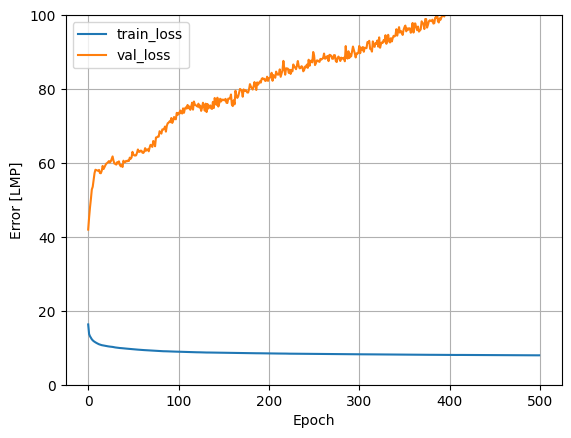

In [174]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Error [LMP]')
plt.legend()
plt.grid(True)

In [172]:
len(x_test)

122674

In [178]:
model.predict(x_test)

3834/3834 ━━━━━━━━━━━━━━━━━━━━ 1s 235us/step


array([[36474296.],
       [36474284.],
       [36474288.],
       ...,
       [30117814.],
       [30117816.],
       [30117808.]], dtype=float32)